In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

In [82]:
df = pd.read_csv("creditcard.csv")
print("Shape:", df.shape)
df.head()


Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [84]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [85]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


In [86]:
fraud_rate = df["Class"].value_counts(normalize=True)
print(fraud_rate)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [87]:

df.isnull().sum().max()


0

In [88]:
df.duplicated().sum()

np.int64(1081)

In [89]:

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [90]:
print("Before removing duplicates:", df.shape)

df = df.drop_duplicates()

print("After removing duplicates:", df.shape)


Before removing duplicates: (284807, 31)
After removing duplicates: (283726, 31)


In [91]:
df["Class"].value_counts()

,count
Class,
0,283253
1,473


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Amount_scaled"] = scaler.fit_transform(df[["Amount"]])
df["Time_scaled"] = scaler.fit_transform(df[["Time"]])

df_model = df.drop(["Amount", "Time"], axis=1)


In [94]:
print(df_model)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V22       V23  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.27783

Class
0    283253
1       473
Name: count, dtype: int64


<Axes: title={'center': 'Transaction Class Distribution'}, xlabel='Class'>

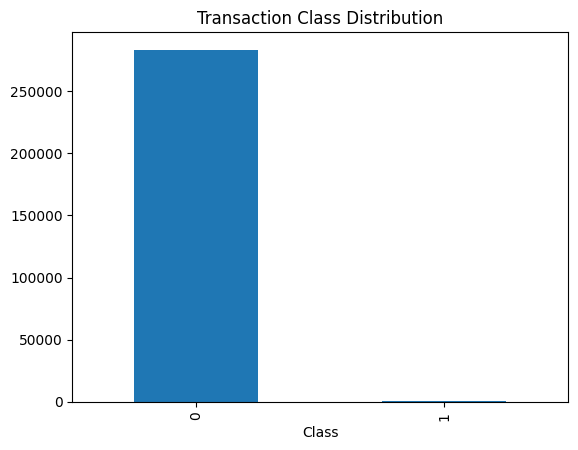

In [95]:
fraud_counts = df["Class"].value_counts()
print(fraud_counts)
fraud_counts.plot(kind="bar", title="Transaction Class Distribution")

In [96]:
df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


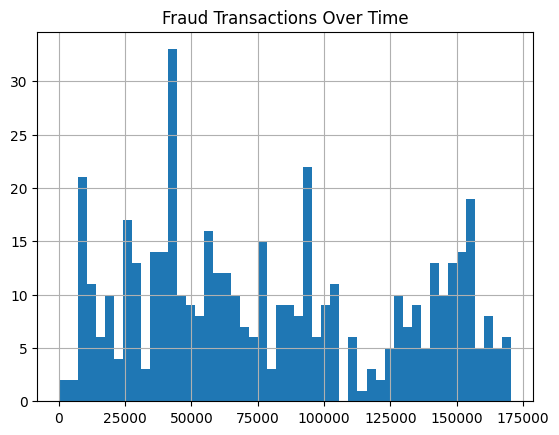

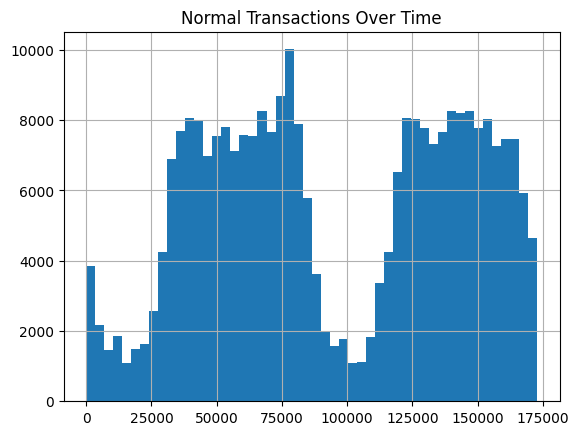

In [97]:
df[df["Class"] == 1]["Time"].hist(bins=50)
plt.title("Fraud Transactions Over Time")
plt.show()

df[df["Class"] == 0]["Time"].hist(bins=50)
plt.title("Normal Transactions Over Time")
plt.show()

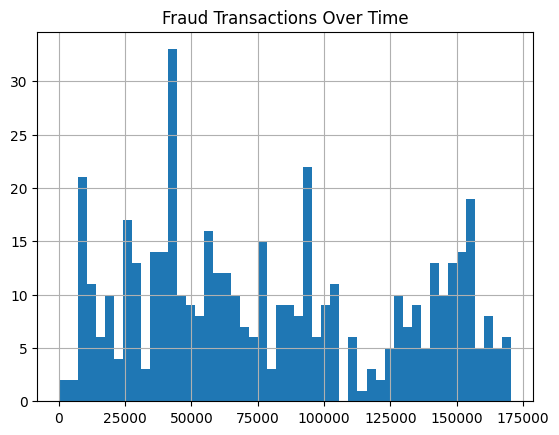

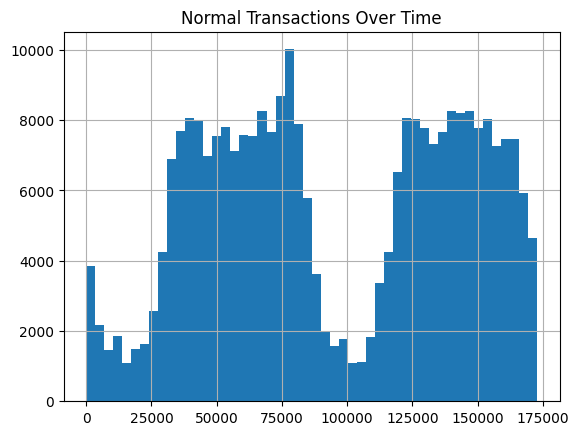

In [98]:
df[df["Class"] == 1]["Time"].hist(bins=50)
plt.title("Fraud Transactions Over Time")
plt.show()

df[df["Class"] == 0]["Time"].hist(bins=50)
plt.title("Normal Transactions Over Time")
plt.show()


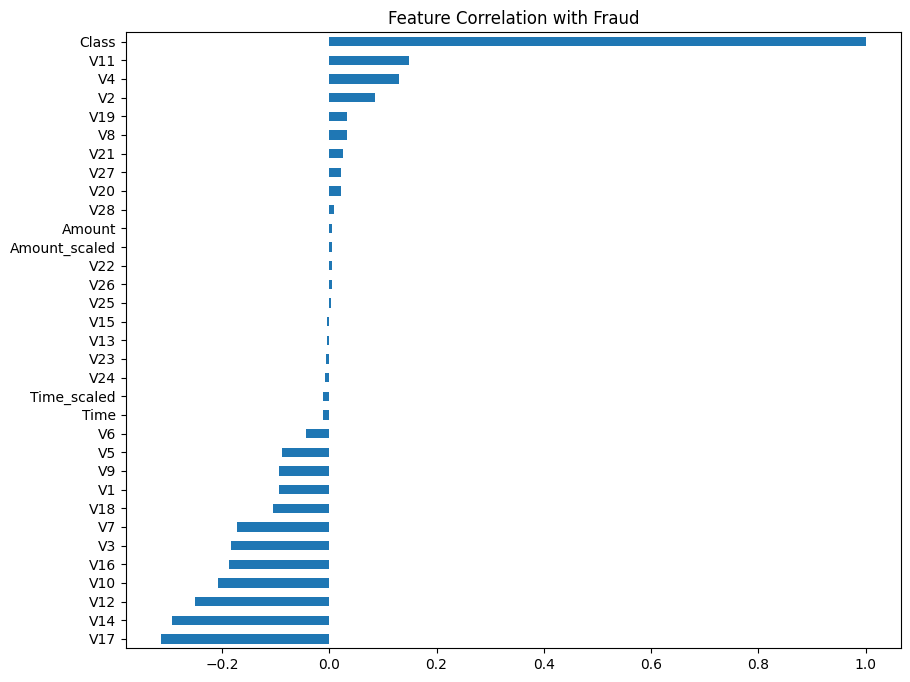

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
df.corr()["Class"].sort_values().plot(kind="barh")
plt.title("Feature Correlation with Fraud")
plt.show()


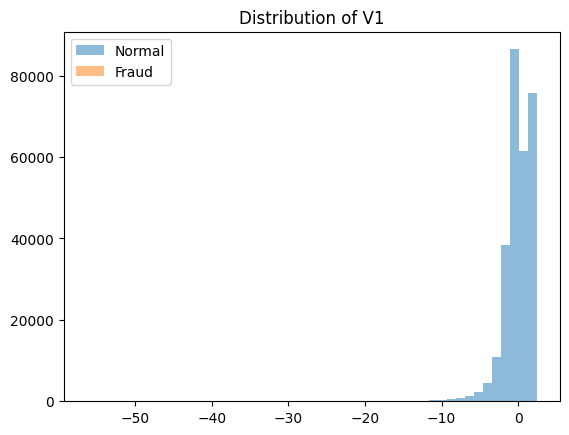

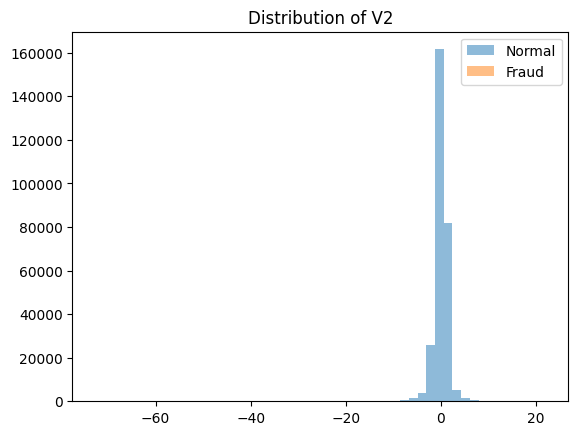

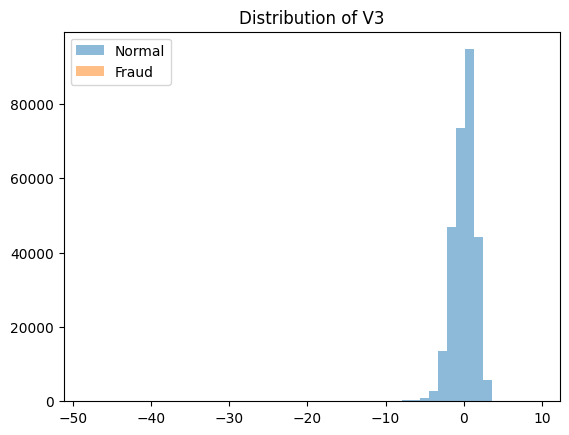

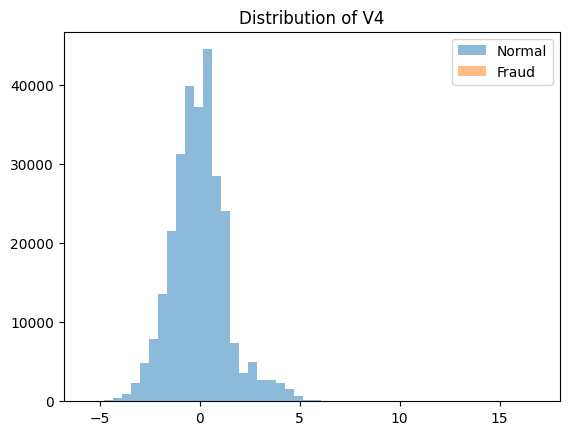

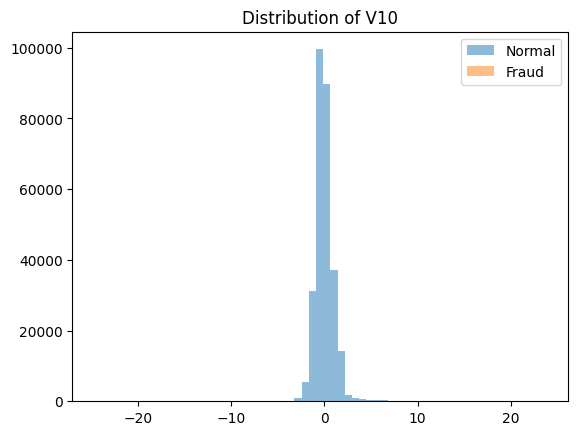

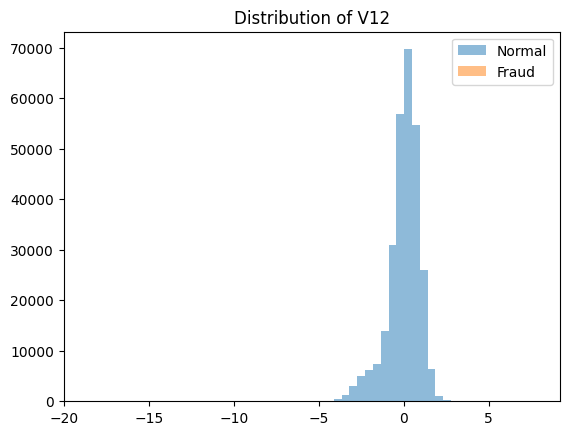

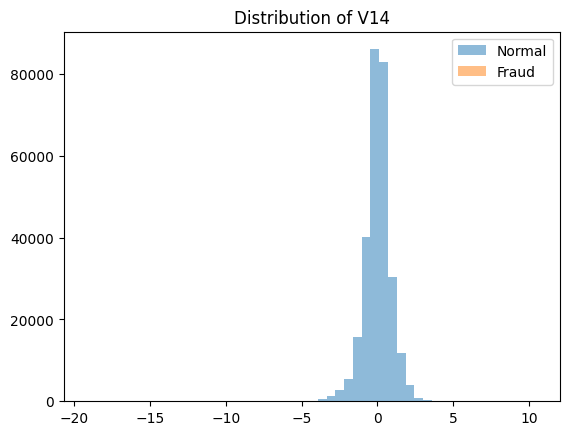

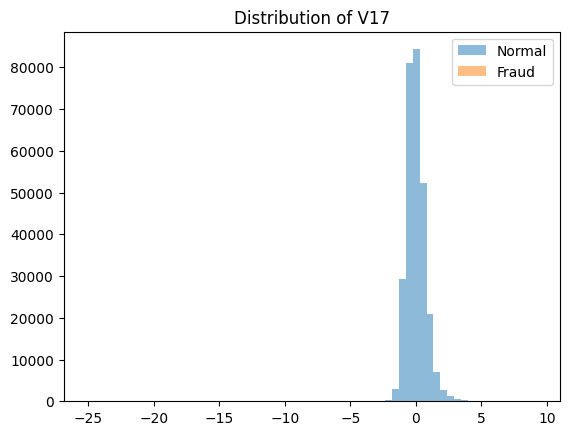

In [100]:
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

for col in ["V1","V2","V3","V4","V10","V12","V14","V17"]:
    plt.figure()
    plt.hist(normal[col], bins=50, alpha=0.5, label="Normal")
    plt.hist(fraud[col], bins=50, alpha=0.5, label="Fraud")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()


In [101]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train fraud:", y_train.sum())
print("Test fraud:", y_test.sum())


Train fraud: 378
Test fraud: 95


In [103]:
from sklearn.preprocessing import StandardScaler

amount_scaler = StandardScaler()

X_train["Amount_scaled"] = amount_scaler.fit_transform(X_train[["Amount"]])
X_test["Amount_scaled"] = amount_scaler.transform(X_test[["Amount"]])


In [104]:
import numpy as np

time_scaler = StandardScaler()

X_train["Time_scaled"] = time_scaler.fit_transform(X_train[["Time"]])
X_test["Time_scaled"] = time_scaler.transform(X_test[["Time"]])
seconds_in_day = 24 * 60 * 60

X_train["Time_sin"] = np.sin(2 * np.pi * X_train["Time"] / seconds_in_day)
X_train["Time_cos"] = np.cos(2 * np.pi * X_train["Time"] / seconds_in_day)

X_test["Time_sin"] = np.sin(2 * np.pi * X_test["Time"] / seconds_in_day)
X_test["Time_cos"] = np.cos(2 * np.pi * X_test["Time"] / seconds_in_day)


In [105]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.array([0, 1])
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: np.float64(0.5008340614822464), 1: np.float64(300.23809523809524)}

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    max_iter=1000,
    class_weight=class_weight_dict,
    n_jobs=-1
)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight=class_weight_dict,
    n_jobs=-1
)


In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight=class_weight_dict,
    n_jobs=-1
)

lr.fit(X_train, y_train)


LogisticRegression(class_weight={0: np.float64(0.5008340614822464),
                                 1: np.float64(300.23809523809524)},
                   max_iter=1000, n_jobs=-1)

In [107]:
y_test_proba = lr.predict_proba(X_test)[:, 1]
y_test_pred = lr.predict(X_test)


In [108]:
y_test_pred
y_test_proba


array([0.02862681, 0.03634219, 0.01190801, ..., 0.06763418, 0.01826825,
       0.04384968])

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



In [110]:
from sklearn.metrics import roc_auc_score

roc = roc_auc_score(y_test, y_test_proba)
print("ROC-AUC:", roc)


ROC-AUC: 0.9697962315897244


In [111]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
pr_auc = auc(recall, precision)
print("PR-AUC:", pr_auc)


PR-AUC: 0.6833317641984048


In [112]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print("TN:", tn, "FP:", fp, "FN:", fn, "TP:", tp)


TN: 55195 FP: 1456 FN: 12 TP: 83


In [113]:
COST_FN = 100
COST_FP = 1
total_cost = COST_FN * fn + COST_FP * fp
print("Total Business Cost:", total_cost)

Total Business Cost: 2656


In [114]:
import numpy as np
from sklearn.metrics import confusion_matrix

thresholds = np.linspace(0.01, 0.99, 100)

COST_FN = 100
COST_FP = 1

best_threshold = 0.5
best_cost = float("inf")
result = []

for t in thresholds:
    y_pred_t = (y_test_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()

    cost = COST_FN * fn + COST_FP * fp
    result.append((t, cost, tn, fp, fn, tp))
    if cost < best_cost:
        best_cost = cost
        best_threshold = t

print("Best threshold:", best_threshold)
print("Minimum business cost:", best_cost)


Best threshold: 0.8415151515151514
Minimum business cost: 1757


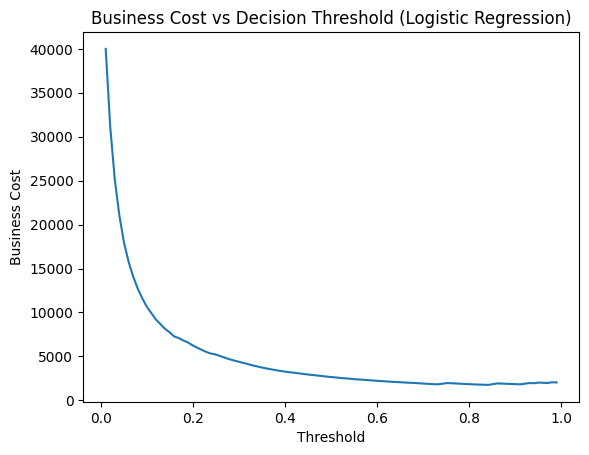

In [115]:
import matplotlib.pyplot as plt

costs_lr = [r[1] for r in result]
ths_lr = [r[0] for r in result]

plt.figure()
plt.plot(ths_lr, costs_lr)
plt.xlabel("Threshold")
plt.ylabel("Business Cost")
plt.title("Business Cost vs Decision Threshold (Logistic Regression)")
plt.show()


In [117]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=50,
    random_state=42,
    n_jobs=-1,
    class_weight=class_weight_dict
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: np.float64(0.5008340614822464),
                                     1: np.float64(300.23809523809524)},
                       max_depth=10, min_samples_leaf=50, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [118]:
y_test_proba_rf = rf.predict_proba(X_test)[:, 1]
y_test_pred_rf = rf.predict(X_test)


In [119]:
print(y_test_proba_rf)

[0.00291942 0.00584793 0.05054949 ... 0.00380827 0.01463702 0.0052042 ]


In [120]:
print(y_test_pred_rf)

[0 0 0 ... 0 0 0]


In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.81      0.78      0.80        95

    accuracy                           1.00     56746
   macro avg       0.91      0.89      0.90     56746
weighted avg       1.00      1.00      1.00     56746



In [122]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
print(cm)

[[56634    17]
 [   21    74]]


In [123]:
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:", acc_rf)


Accuracy: 0.9993303492757198


In [124]:
from sklearn.metrics import roc_auc_score

roc_rf = roc_auc_score(y_test, y_test_proba_rf)
print("ROC-AUC:", roc_rf)


ROC-AUC: 0.9756895637090998


In [125]:
from sklearn.metrics import precision_recall_curve, auc

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

print("PR-AUC:", pr_auc_rf)


PR-AUC: 0.7438836527044587


In [126]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_rf)
tn, fp, fn, tp = cm.ravel()

print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)


TN: 56634
FP: 17
FN: 21
TP: 74


In [127]:
COST_FN = 100
COST_FP = 1

business_cost_rf = COST_FN * fn + COST_FP * fp
print("Total Business Cost:", business_cost_rf)


Total Business Cost: 2117


In [128]:
y_test
y_test_proba_rf

array([0.00291942, 0.00584793, 0.05054949, ..., 0.00380827, 0.01463702,
       0.0052042 ])

In [129]:
import numpy as np
from sklearn.metrics import confusion_matrix

COST_FN = 100
COST_FP = 1

thresholds = np.linspace(0.001, 0.999, 200)

best_threshold = 0.5
best_cost = float("inf")

results = []

for t in thresholds:
    y_pred_t = (y_test_proba_rf >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()

    cost = COST_FN * fn + COST_FP * fp

    results.append((t, cost, tn, fp, fn, tp))

    if cost < best_cost:
        best_cost = cost
        best_threshold = t

print("Best Threshold:", best_threshold)
print("Minimum Business Cost:", best_cost)


Best Threshold: 0.15145226130653267
Minimum Business Cost: 1690


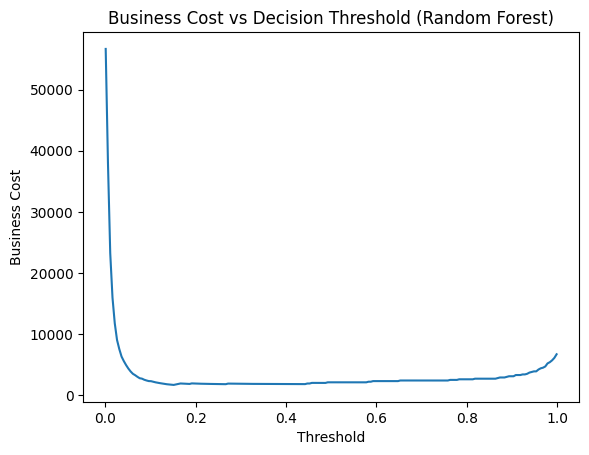

In [130]:
import matplotlib.pyplot as plt

costs = [r[1] for r in results]
ths = [r[0] for r in results]

plt.figure()
plt.plot(ths, costs)
plt.xlabel("Threshold")
plt.ylabel("Business Cost")
plt.title("Business Cost vs Decision Threshold (Random Forest)")
plt.show()


In [ ]:
"Risk Scoring Engine using the Random Forest algorithm"

In [132]:
rf_probs = rf.predict_proba(X_test)[:, 1]

In [136]:
print(rf_probs)

[0.00291942 0.00584793 0.05054949 ... 0.00380827 0.01463702 0.0052042 ]


In [133]:
risk_score = (rf_probs * 100).round().astype(int)


In [134]:
def risk_band(score):
    if score < 30:
        return "Low"
    elif score < 70:
        return "Medium"
    else:
        return "High"


In [137]:
risk_category = [risk_band(s) for s in risk_score]

In [139]:
results_df = X_test.copy()
results_df["Actual"] = y_test.values
results_df["Fraud_Probability"] = rf_probs
results_df["Risk_Score"] = risk_score
results_df["Risk_Band"] = risk_category

results_df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,Amount_scaled,Time_scaled,Time_sin,Time_cos,Actual,Fraud_Probability,Risk_Score,Risk_Band
86568,61290.0,1.228821,-0.063408,0.274145,0.647465,-0.048135,0.372073,-0.224231,0.079939,0.640759,...,0.001782,11.50,-0.312846,-0.707761,-0.967599,-0.252492,0,0.002919,0,Low
251557,155394.0,-0.203154,1.176678,-0.759595,-0.518472,0.629649,-0.721675,0.638893,0.243377,-0.157488,...,0.261351,1.94,-0.351745,1.273872,-0.953848,0.300290,0,0.005848,1,Low
20232,30881.0,-1.672836,1.401297,1.503940,2.175491,0.699791,1.062139,1.114364,-0.535822,-0.252983,...,0.113900,91.28,0.011771,-1.348111,0.780749,-0.624845,0,0.050549,5,Low
68952,53203.0,0.819379,-1.124913,0.515025,0.513945,-1.009048,0.488484,-0.580672,0.187686,-0.999142,...,0.058407,228.00,0.568071,-0.878056,-0.664959,-0.746880,0,0.005220,1,Low
191852,129429.0,2.009701,0.105635,-1.752759,0.588312,0.374801,-0.637884,0.009260,-0.129487,0.492619,...,-0.043404,1.41,-0.353901,0.727104,0.012435,-0.999923,0,0.043392,4,Low
94289,64816.0,1.100851,0.157223,0.460898,1.144401,-0.262777,-0.207127,-0.069886,0.108077,-0.189285,...,0.012033,20.99,-0.274232,-0.633511,-0.999999,0.001164,0,0.006406,1,Low
16245,27650.0,-1.428601,-0.230183,0.913877,-0.555968,0.934244,-0.490981,1.585359,-0.453572,-0.813235,...,-0.349317,234.90,0.596147,-1.416149,0.904765,-0.425911,0,0.007550,1,Low
16056,27485.0,-0.915128,0.500570,0.169310,-0.839501,3.080748,3.550344,0.456991,0.626990,-0.094290,...,-0.113160,21.44,-0.272401,-1.419623,0.909810,-0.415024,0,0.004736,0,Low
158543,111433.0,1.905170,-0.048129,-0.606486,1.669746,0.140037,0.201096,-0.171609,-0.052682,2.057745,...,-0.060019,20.00,-0.278261,0.348146,0.968998,-0.247069,0,0.034715,3,Low
212344,138819.0,-1.461922,0.398294,0.518684,-1.064658,0.552358,2.088577,-0.345377,1.142239,0.294364,...,0.081930,59.82,-0.116237,0.924837,-0.621319,-0.783558,0,0.004209,0,Low


In [145]:
def decision_engine(row):
    if row["Risk_Band"] == "High":
        return "BLOCK / INVESTIGATE"
    elif row["Risk_Band"] == "Medium":
        return "MANUAL REVIEW"
    else:
        return "AUTO APPROVE"

results_df["Decision"] = results_df.apply(decision_engine, axis=1)


In [146]:
print(results_df)

            Time        V1        V2        V3        V4        V5        V6  \
86568    61290.0  1.228821 -0.063408  0.274145  0.647465 -0.048135  0.372073   
251557  155394.0 -0.203154  1.176678 -0.759595 -0.518472  0.629649 -0.721675   
20232    30881.0 -1.672836  1.401297  1.503940  2.175491  0.699791  1.062139   
68952    53203.0  0.819379 -1.124913  0.515025  0.513945 -1.009048  0.488484   
191852  129429.0  2.009701  0.105635 -1.752759  0.588312  0.374801 -0.637884   
...          ...       ...       ...       ...       ...       ...       ...   
56516    47464.0 -1.162452  0.795672  1.953356  1.654216  1.069023 -0.183501   
188431  127974.0 -2.023289  2.214345 -2.097511 -1.041892 -0.120896 -0.027650   
115561   73912.0  1.180651 -0.199219  1.233565  0.869184 -1.138767 -0.315881   
187644  127623.0  2.061059  0.136698 -1.830805  0.206364  0.705093 -0.326154   
8267     11067.0  1.247134  0.061041  0.888561  0.317248 -0.756993 -0.814185   

              V7        V8        V9  .